In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import time

In [32]:
df=pd.read_csv('/content/final_internship_data.csv')
print(df.columns)

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')


In [33]:
df.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


**Data Normalization**

In [34]:
df.drop(['User Name','Driver Name','User ID'], axis=1, inplace=True)
df.head()

,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [35]:
df_encoded = pd.get_dummies(df, columns=['Car Condition', 'Weather', 'Traffic Condition'], drop_first=True)

# Drop non-feature columns
df_encoded = df_encoded.drop(columns=['key', 'pickup_datetime'])


In [36]:
df_encoded.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,...,bearing,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,...,-2.918897,False,False,True,False,False,False,True,False,False
1,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,...,-0.375217,True,False,False,False,False,False,False,False,True
2,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,...,2.599961,False,False,False,False,True,False,False,False,False
3,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,...,0.133905,False,False,True,False,True,False,False,False,True
4,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,...,-0.502703,False,False,False,False,True,False,False,False,False


In [37]:
#check null values
print(df.isnull().sum())

Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    3
dropoff_latitude     3
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             3
ewr_dist             3
lga_dist             3
sol_dist             3
nyc_dist             3
distance             3
bearing              4
dtype: int64


In [38]:
df=df.fillna(0)

In [39]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
387010,False
387011,False
387012,False
387013,False


# Data Analysis

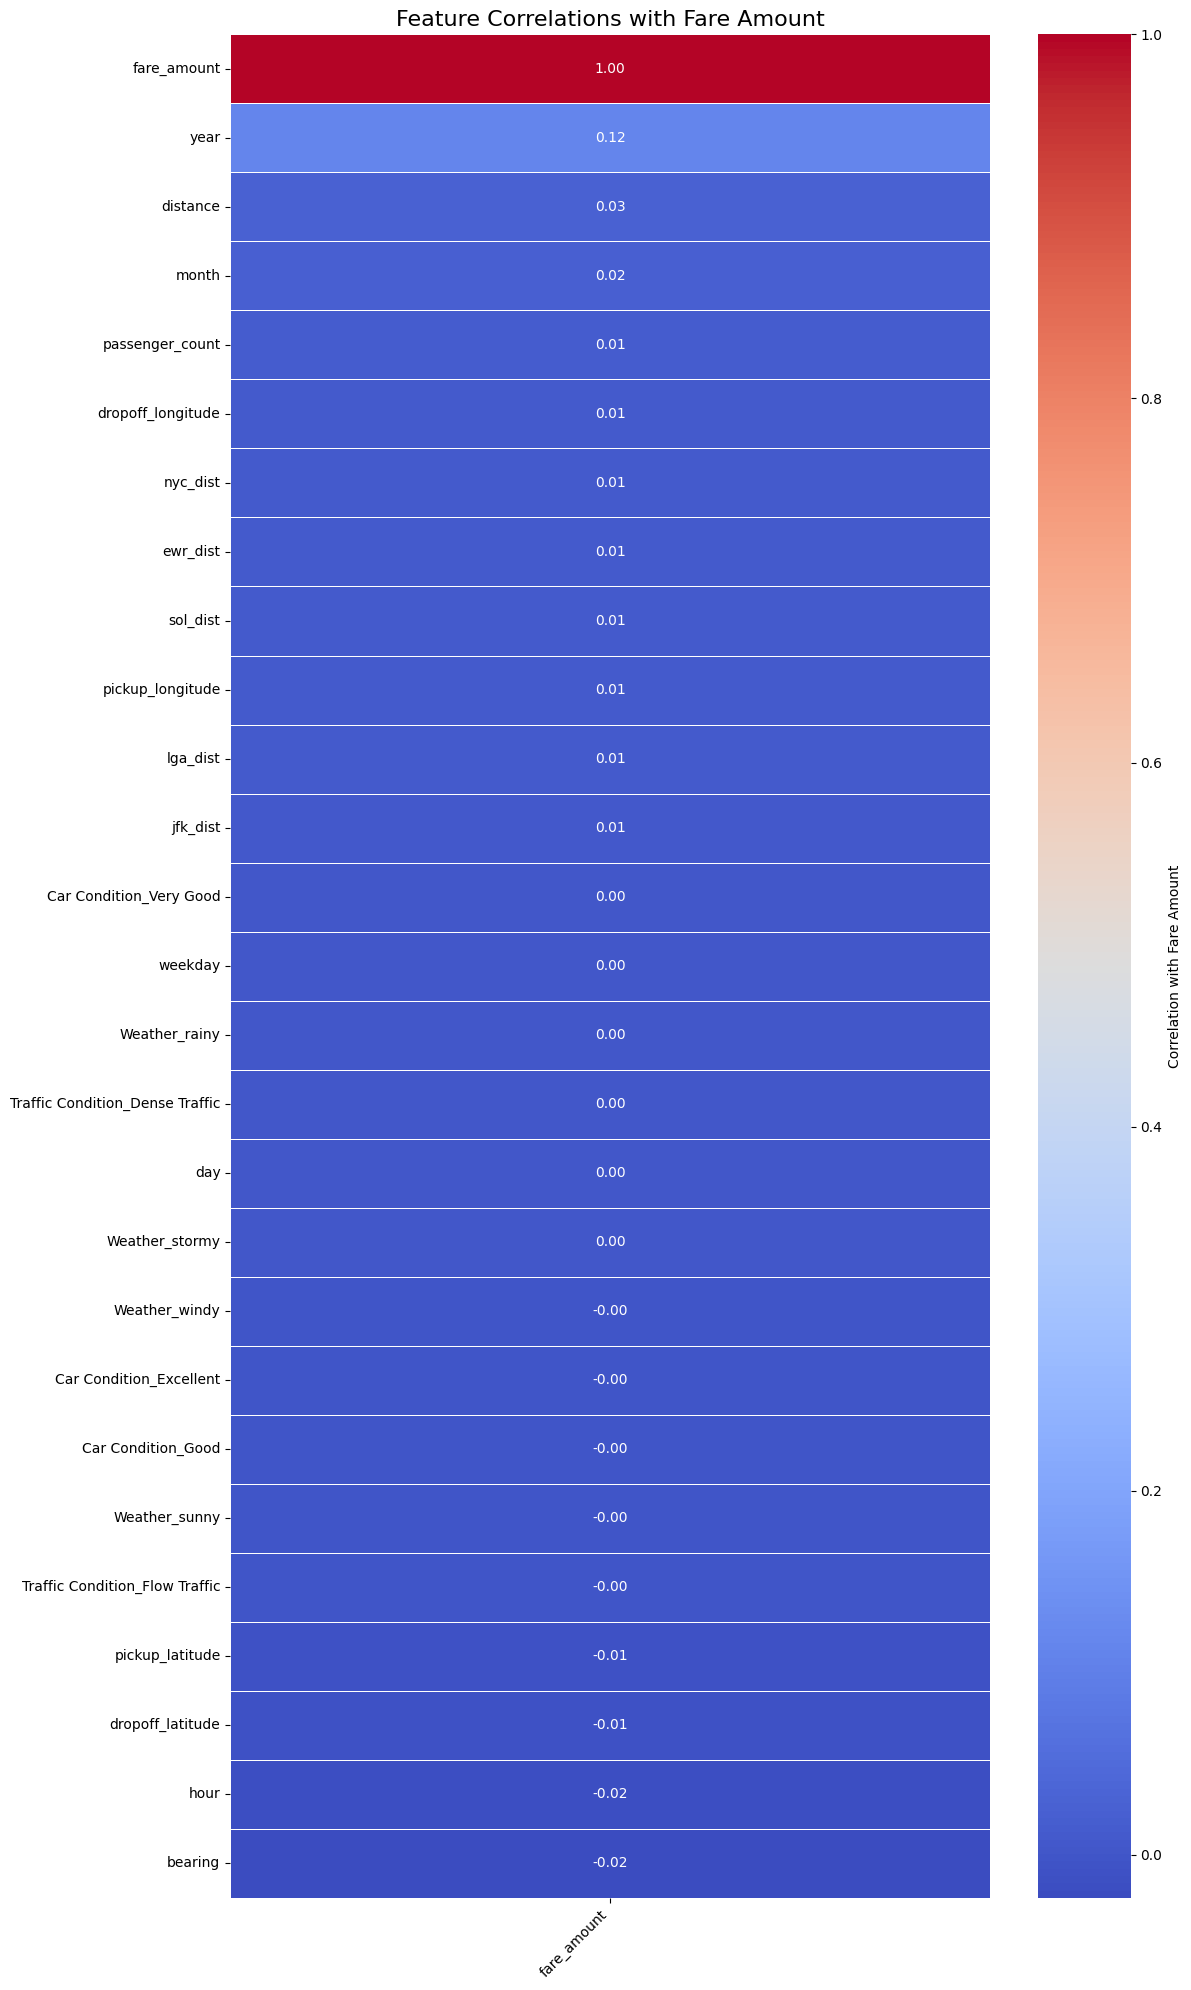

In [40]:
corr_matrix = df_encoded.corr()
# Extract correlations with fare_amount
fare_correlations = corr_matrix[['fare_amount']].sort_values(
    by='fare_amount',
    ascending=False
)
plt.figure(figsize=(12, 20))
heatmap = sns.heatmap(
    fare_correlations,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Correlation with Fare Amount'}
)

plt.title('Feature Correlations with Fare Amount', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Distribution of Numeric Features:


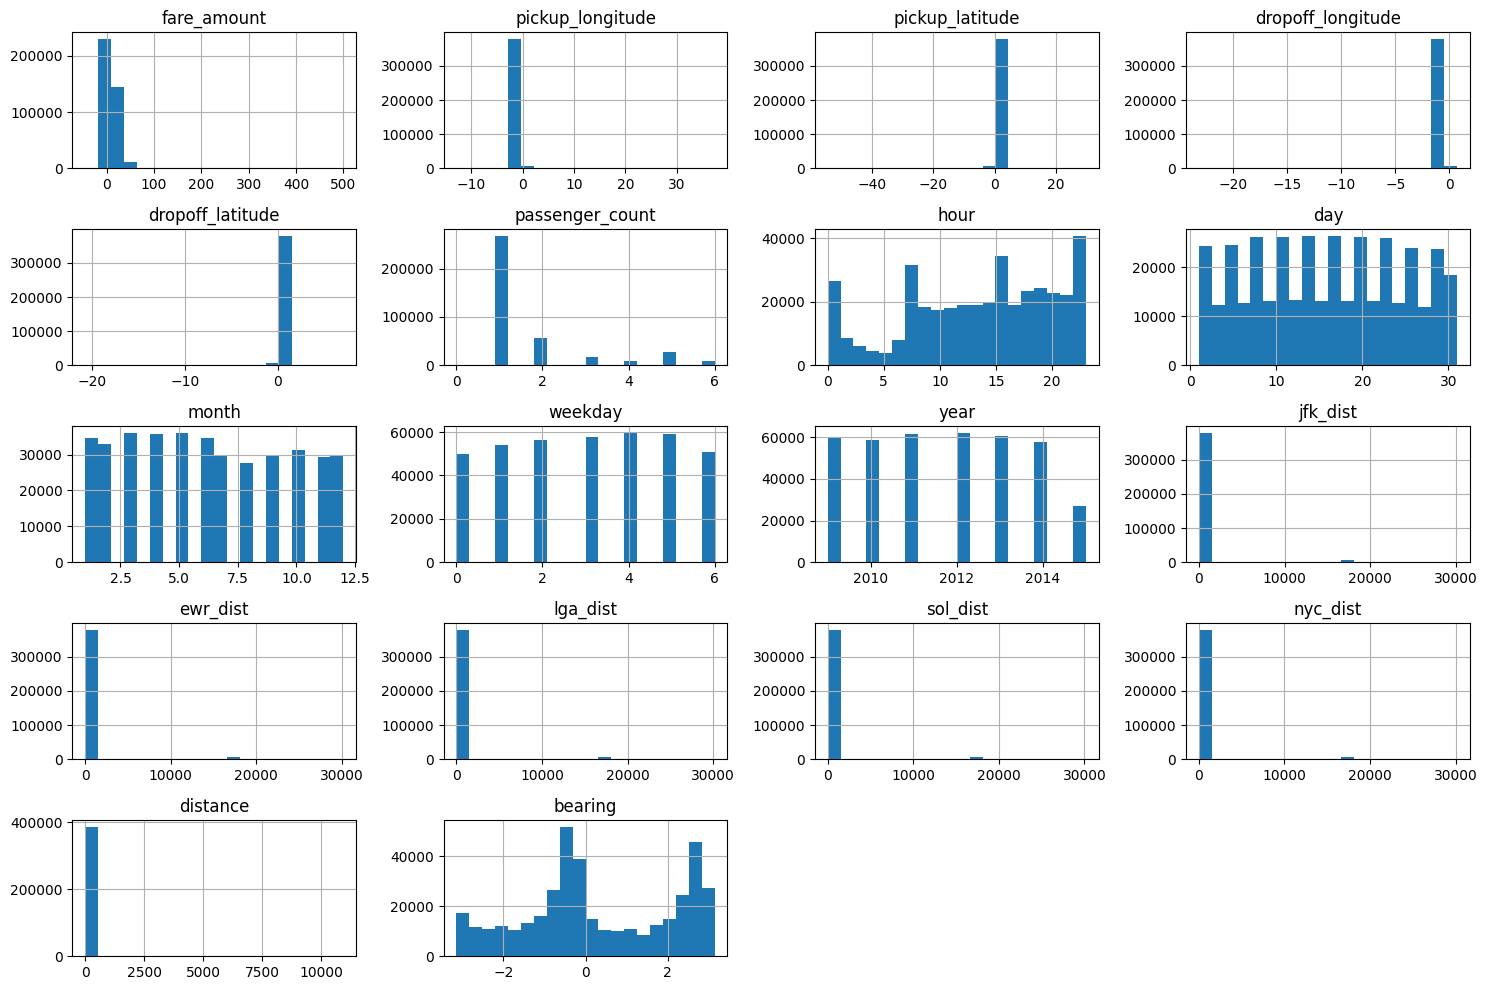


Boxplots for Outlier Detection:


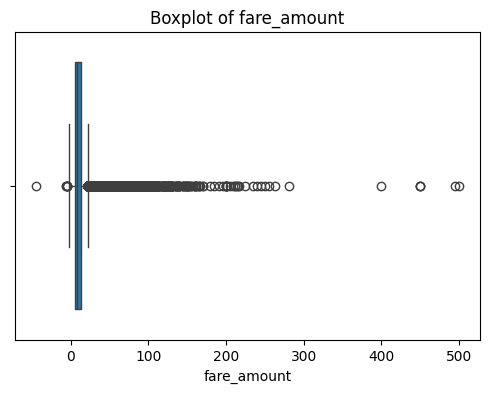

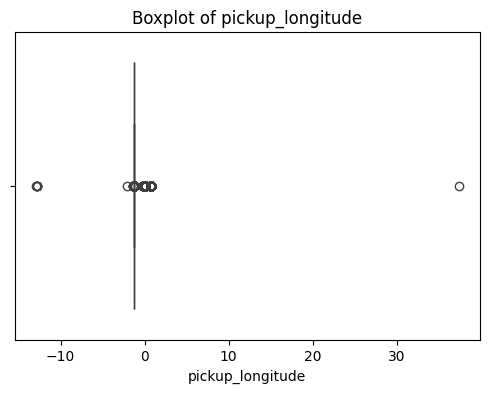

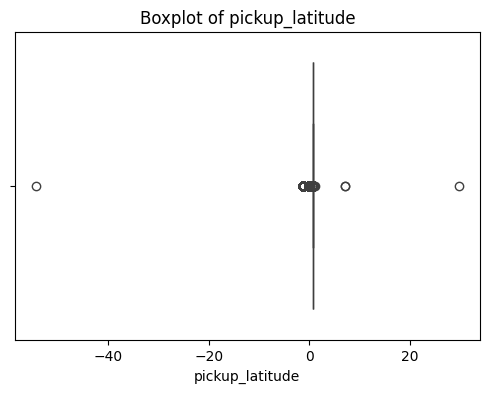

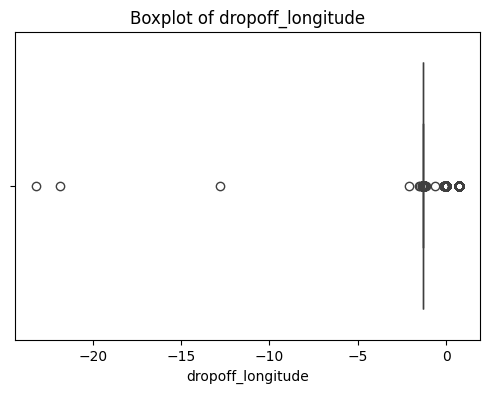

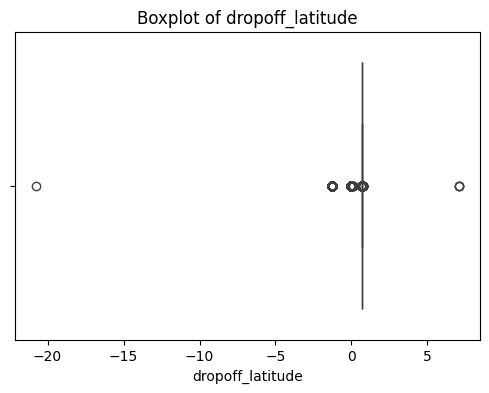

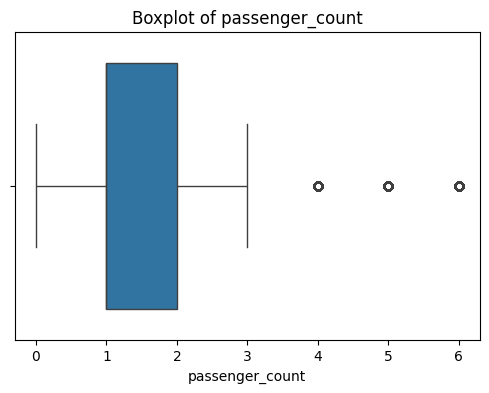

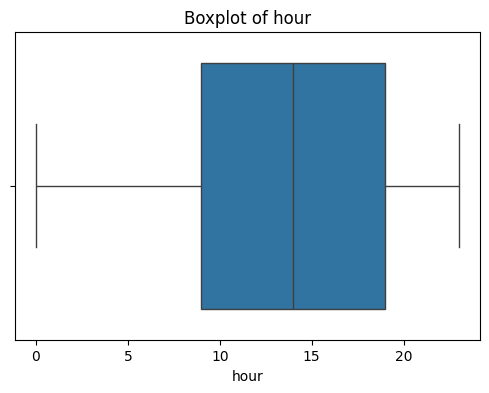

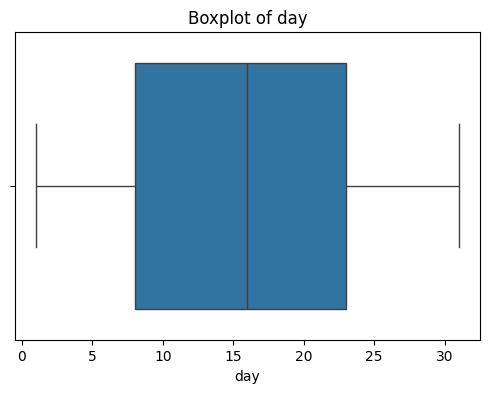

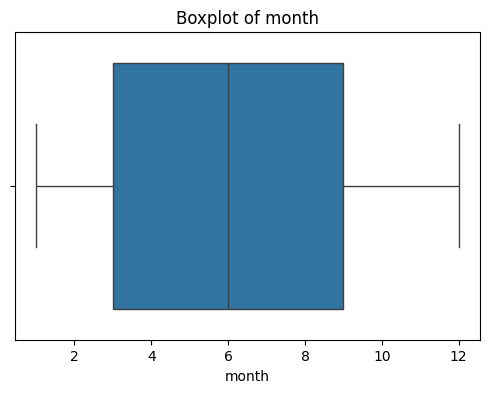

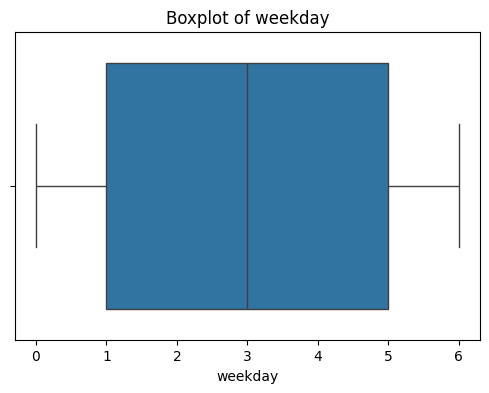

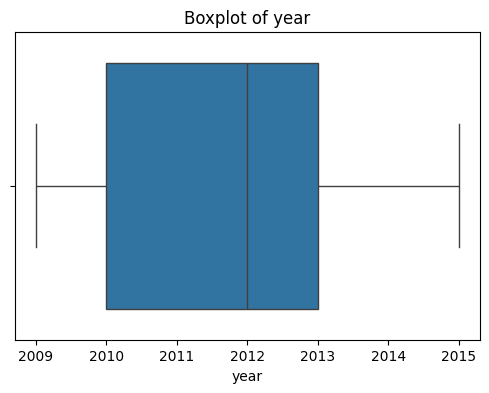

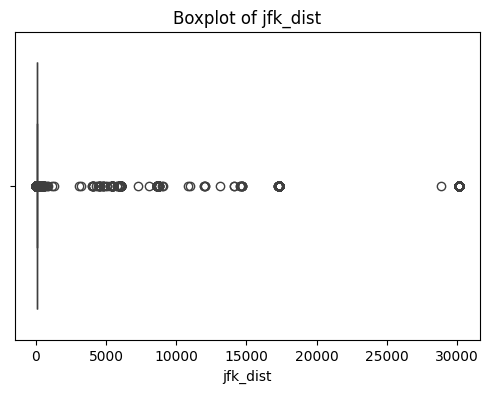

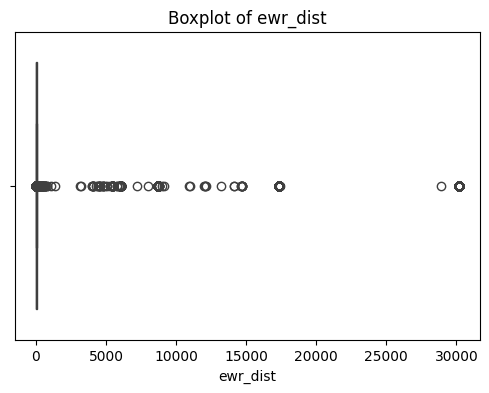

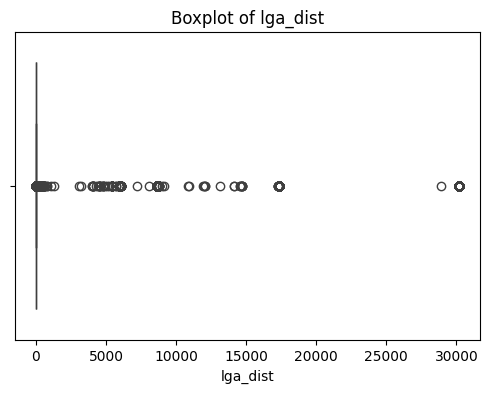

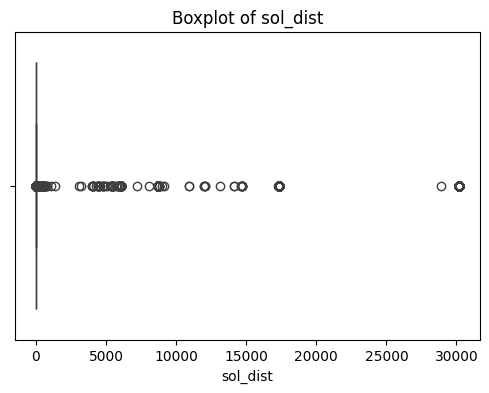

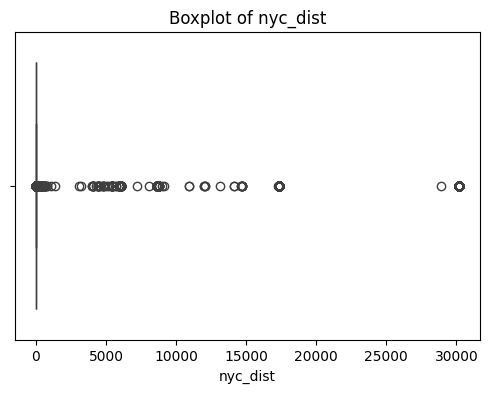

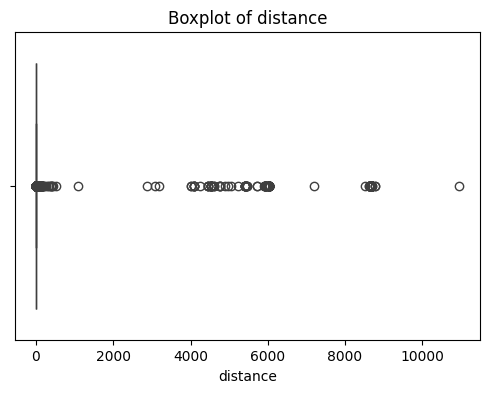

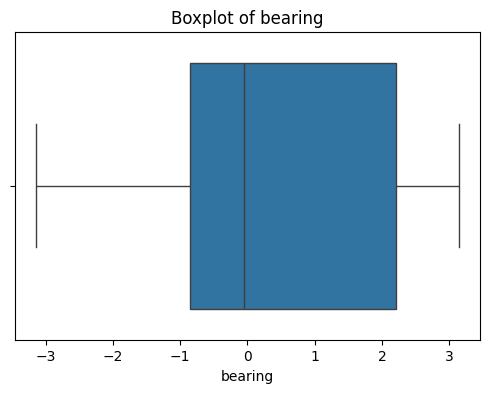

In [41]:
# Visualize distributions of numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("\nDistribution of Numeric Features:")
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()
# Boxplots to check for outliers
print("\nBoxplots for Outlier Detection:")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()



-

In [42]:
def remove_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    return df[z_scores < threshold]

df = remove_outliers_zscore(df, 'fare_amount')
df = remove_outliers_zscore(df, 'distance')
df = remove_outliers_zscore(df, 'nyc_dist')
df = remove_outliers_zscore(df, 'sol_dist')
df = remove_outliers_zscore(df, 'lga_dist')
df = remove_outliers_zscore(df, 'ewr_dist')
df = remove_outliers_zscore(df, 'jfk_dist')
df = remove_outliers_zscore(df, 'year')
df = remove_outliers_zscore(df, 'passenger_count')
df = remove_outliers_zscore(df, 'dropoff_latitude')
df = remove_outliers_zscore(df, 'dropoff_longitude')
df = remove_outliers_zscore(df, 'pickup_latitude')
df = remove_outliers_zscore(df, 'pickup_longitude')

# PCA

In [43]:
from sklearn.preprocessing import StandardScaler

# Drop obviously non-numeric columns
X = df_encoded.drop(['key', 'pickup_datetime'], axis=1, errors='ignore')

# Drop or encode remaining non-numeric data
X_numeric = X.select_dtypes(include=[np.number])

# Fill missing values
X_filled = X_numeric.fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"PCA shape: {X_pca.shape}")


Original shape: (387015, 18)
PCA shape: (387015, 10)


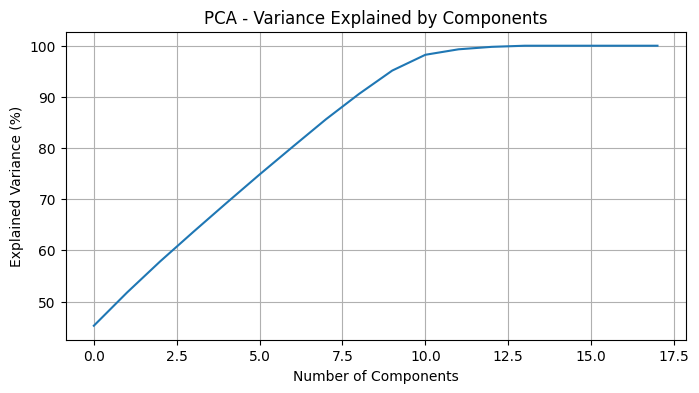

In [45]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_)*100)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)')
plt.title('PCA - Variance Explained by Components')
plt.grid(True)
plt.show()

# Spliting data

- cross validation with shuffle

In [46]:
X = df.drop(columns=['key', 'pickup_datetime', 'fare_amount'])
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

numeric_features = [
    'distance', 'nyc_dist',
    'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'bearing'
]

# Other models

In [48]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", list(categorical_cols))

Categorical columns: ['Car Condition', 'Weather', 'Traffic Condition']


In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# For Tree-Based Models
tree_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep numeric features unscaled
)

In [50]:
# Initialize models
models = {
    "Linear Regression": make_pipeline(preprocessor, LinearRegression()),
    "ElasticNet Regression": make_pipeline(preprocessor, ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)),
    "Random Forest": make_pipeline(tree_preprocessor, RandomForestRegressor()),
    "XGBoost": make_pipeline(tree_preprocessor, XGBRegressor())
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    start_time = time.time()

    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    elapsed = time.time() - start_time

    # Store results
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Time (s)': elapsed
    }

    # Print summary
    print(f"\n{name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"Training & Testing Time: {elapsed:.2f} seconds")
    print("-" * 50)

# Compare model performance
print("\n=== Model Performance Comparison ===")
print(f"{'Model':<20} {'RMSE':<10} {'MAE':<10} {'R²':<10} {'Time (s)':<10}")
for name, metrics in results.items():
    print(f"{name:<20} {metrics['RMSE']:<10.4f} {metrics['MAE']:<10.4f} "
          f"{metrics['R²']:<10.4f} {metrics['Time (s)']:<10.2f}")

# Identify best model by R² (you can change this to RMSE/MAE)
best_model_name = max(results, key=lambda x: results[x]['R²'])
print(f"\nBest performing model: {best_model_name} (R² = {results[best_model_name]['R²']:.4f})")


Linear Regression Results:
RMSE: 2.5550
MAE: 1.6871
R²: 0.6878
Training & Testing Time: 0.74 seconds
--------------------------------------------------

ElasticNet Regression Results:
RMSE: 2.5699
MAE: 1.7096
R²: 0.6841
Training & Testing Time: 0.96 seconds
--------------------------------------------------

Random Forest Results:
RMSE: 2.1497
MAE: 1.3356
R²: 0.7790
Training & Testing Time: 921.15 seconds
--------------------------------------------------

XGBoost Results:
RMSE: 2.0702
MAE: 1.2432
R²: 0.7950
Training & Testing Time: 4.40 seconds
--------------------------------------------------

=== Model Performance Comparison ===
Model                RMSE       MAE        R²         Time (s)  
Linear Regression    2.5550     1.6871     0.6878     0.74      
ElasticNet Regression 2.5699     1.7096     0.6841     0.96      
Random Forest        2.1497     1.3356     0.7790     921.15    
XGBoost              2.0702     1.2432     0.7950     4.40      

Best performing model: XGBoost 

# Tuning

In [56]:
from xgboost import XGBRegressor

pipeline = Pipeline([
    ('preprocessor', tree_preprocessor),  # use OneHotEncoder only
    ('regressor', XGBRegressor(n_jobs=-1, random_state=42))
])

param_grid = {
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.1, 0.05],
    'regressor__n_estimators': [100, 200]
}

grid = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid.fit(X_train, y_train)

# Evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best R²:", r2_score(y_test, y_pred))
print("Best RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best R²: 0.7989263855557852
Best RMSE: 2.0504057445174086


In [59]:
# Feature importance visualization
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[-10:]  # top 10 features
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()